In [2]:
import numpy as np


In [3]:
core_name=np.load("../data/trace_core")
max_len=0
position=0
for i in range(len(core_name)):
    if(6>len(core_name[i])>max_len):
        max_len=len(core_name[i])
        position=i
max_len,position

(5, 8817)

In [4]:
dir2={}
name2={}
unique2={}

name2key={}
dir2key={}
final_name=[]
name_count=1
dir_count=1
for i in range(len(core_name)):
    try:
        if(len(core_name[i])==2):
            name=(core_name[i][0],core_name[i][1])
            final_name.append(name)
            if not name in name2key.keys():
                name2key[name]=name_count
                name_count+=1
            temp_dir=core_name[i][0]
            if not temp_dir in dir2key.keys():
                dir2key[temp_dir]=dir_count
                dir_count+=1
                
            unique=core_name[i][0]+'/'+core_name[i][1]
            if unique in unique2.keys():
                unique2[unique]+=1
            else:
                unique2[unique]=1
            if core_name[i][0] in dir2.keys():
                dir2[core_name[i][0]]+=1
            else:
                dir2[core_name[i][0]]=1
            if core_name[i][1] in name2.keys():
                name2[core_name[i][1]]+=1
            else:
                name2[core_name[i][1]]=1
            
    except Exception as e:
                      pass
key2name={a:b for (b,a) in name2key.items()}
key2dir={a:b for (b,a) in dir2key.items()}

name2key[("UNK","UNK")]=0
key2name[0]=("UNK","UNK")
dir2key["UNK"]=0
key2dir[0]="UNK"

In [5]:
count={}
for item in unique2.values():
    if item in count.keys():
        count[item]+=1
    else:
        count[item]=1
count

{1: 375,
 2: 1,
 4: 7,
 5: 4,
 6: 2,
 10: 298,
 11: 3,
 12: 16,
 13: 45,
 14: 2,
 18: 3,
 19: 135,
 20: 6,
 21: 348,
 26: 1,
 114: 1}

In [6]:
final_name

[('scripts', 'Kbuild.include'),
 ('miscutils', 'flash_lock_unlock.c'),
 ('miscutils', 'devmem.c'),
 ('miscutils', 'ubirename.c'),
 ('miscutils', 'chrt.c'),
 ('miscutils', 'strings.c'),
 ('miscutils', 'readahead.c'),
 ('miscutils', 'less.c'),
 ('miscutils', 'runlevel.c'),
 ('miscutils', 'beep.c'),
 ('miscutils', 'inotifyd.c'),
 ('miscutils', 'hdparm.c'),
 ('miscutils', 'microcom.c'),
 ('miscutils', 'timeout.c'),
 ('miscutils', 'dc.c'),
 ('miscutils', 'crontab.c'),
 ('miscutils', 'man.c'),
 ('miscutils', 'chat.c'),
 ('miscutils', 'conspy.c'),
 ('miscutils', 'flash_eraseall.c'),
 ('miscutils', 'crond.c'),
 ('miscutils', 'wall.c'),
 ('miscutils', 'adjtimex.c'),
 ('miscutils', 'mt.c'),
 ('miscutils', 'taskset.c'),
 ('miscutils', 'setsid.c'),
 ('miscutils', 'makedevs.c'),
 ('miscutils', 'fbsplash.c'),
 ('miscutils', 'volname.c'),
 ('miscutils', 'rx.c'),
 ('miscutils', 'flashcp.c'),
 ('miscutils', 'i2c_tools.c'),
 ('miscutils', 'nandwrite.c'),
 ('miscutils', 'last_fancy.c'),
 ('miscutils', 'l

In [7]:
dir_seq=[]
name_seq=[]
for item in final_name:
    dir_seq.append(dir2key[item[0]])
    name_seq.append(name2key[item])

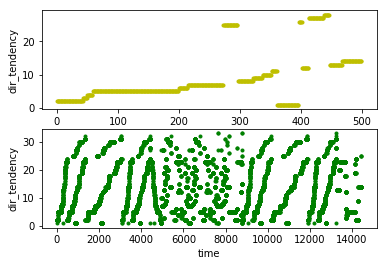

In [9]:
import matplotlib.pyplot as plt
plt.subplot(2,1,1)
plt.scatter(range(500),dir_seq[500:1000],c='y',marker='.')
plt.ylabel("dir_tendency")
plt.xlabel("time")

plt.subplot(2,1,2)
plt.scatter(range(len(dir_seq)),dir_seq,c='g',marker='.')
plt.ylabel("dir_tendency")
plt.xlabel("time")

plt.savefig("../img/dir_tendency")

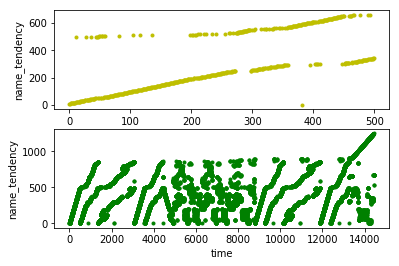

In [10]:
plt.subplot(2,1,1)
plt.scatter(range(500),name_seq[500:1000],c='y',marker='.')
plt.ylabel("name_tendency")
plt.xlabel("time")

plt.subplot(2,1,2)
plt.scatter(range(len(name_seq)),name_seq,c='g',marker='.')
plt.ylabel("name_tendency")
plt.xlabel("time")

plt.savefig("../img/name_tendency.png")

In [11]:
name_seq_delta=[]
for i in range(len(name_seq)-1):
    name_seq_delta.append(name_seq[i+1]-name_seq[i])
len(name_seq_delta)

14441

In [12]:
name_delta={}
for i in name_seq_delta:
    if i in name_delta.keys():
        name_delta[i]+=1
    else:
        name_delta[i]=1
len(name_delta)

966

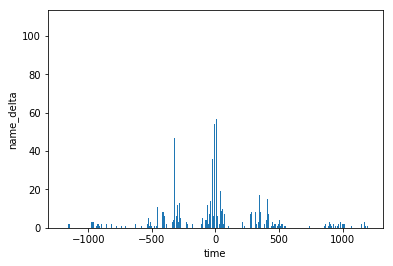

In [13]:
name_delta_x=[]
name_delta_y=[]

for i in name_delta.items():
    if i[0] != 1 and i[0] != 0 and i[0]!=-1:
        name_delta_x.append(i[0])
        name_delta_y.append(i[1])
plt.bar(name_delta_x,name_delta_y)
plt.ylabel("name_delta")
plt.xlabel("time")

plt.savefig("../img/name_delta_distr.png")

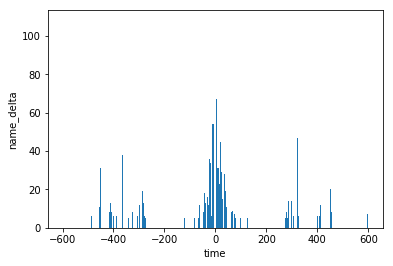

In [14]:
name_delta_x=[]
name_delta_y=[]

for i in name_delta.items():
    #if i[0] != 1 and i[0] != 0 and i[0]!=-1:
    if i[1]>=5 and i[0] != 1 and i[0] != 0 and i[0]!=-1:
        name_delta_x.append(i[0])
        name_delta_y.append(i[1])
plt.bar(name_delta_x,name_delta_y)
plt.ylabel("name_delta")
plt.xlabel("time")

plt.savefig("../img/name_delta_filter_distr.png")

In [15]:
name_delta_filter={}
count=0
for i in name_delta.items():
    if i[1]>=37:
        name_delta_filter[i[0]]=i[1]
        count+=i[1]
len(name_seq_delta),count,count/len(name_seq_delta),len(name_delta),len(name_delta_filter),

(14441, 10183, 0.7051450730558826, 966, 30)

In [16]:
delta2key={a:b+2 for b,a in enumerate(name_delta_filter.keys())}
key2delta={a:b for b,a in delta2key.items()}
key2delta[0]="UNK"
key2delta[1]="PAD"
key2delta

{0: 'UNK',
 1: 'PAD',
 2: 0,
 3: 1,
 4: 2,
 5: 3,
 6: 4,
 7: 5,
 8: 6,
 9: 7,
 10: 9,
 11: 11,
 12: 322,
 13: 18,
 14: -365,
 15: 20,
 16: 318,
 17: -24,
 18: -22,
 19: -2,
 20: -13,
 21: -11,
 22: -10,
 23: -9,
 24: -8,
 25: -7,
 26: -6,
 27: -5,
 28: -4,
 29: -3,
 30: -1,
 31: -321}

In [17]:
name_seq_delta_key=[]
for i in name_seq_delta:
    try:
        name_seq_delta_key.append(delta2key[i])
    except Exception as e:
        name_seq_delta_key.append(0)

In [18]:
from keras.layers import Dense,Activation
from keras.layers.recurrent import SimpleRNN,LSTM,GRU
from keras.models import Sequential
from keras.utils import plot_model
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.utils import to_categorical
from keras import regularizers

/home/drdh/.local/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [19]:
SEQLEN=5
STEP=1
NAME_TYPE=32

input_name=[]
label_name=[]
for i in range(0,len(name_seq_delta_key)-SEQLEN,STEP):
    input_name.append(name_seq_delta_key[i:i+SEQLEN])
    label_name.append(name_seq_delta_key[i+SEQLEN])
input_name

[[3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3, 3, 3],
 [3, 3, 3,

In [20]:
input_name=to_categorical(input_name)
label_name=to_categorical(label_name)
input_name.shape,label_name.shape

((14436, 5, 32), (14436, 32))

In [ ]:
HIDDEN_SIZE=16
BATCH_SIZE=1
NUM_ITERATIONS=len(input_name)-10
#NUM_ITERATIONS=100
NUM_EPOCHS_PER_ITERATION=1

model=Sequential()
#model.add(LSTM(HIDDEN_SIZE,return_sequences=False,input_shape=(SEQLEN,NAME_TYPE),unroll=True,
#               kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)))
model.add(LSTM(HIDDEN_SIZE,return_sequences=False,input_shape=(SEQLEN,NAME_TYPE),unroll=True,dropout=0.2))
model.add(Dense(NAME_TYPE))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=['acc'])

total_count=0
has_pred=0
has_pred_true=0

shall_pred=0
shall_pred_true=0

precision=[]
recall=[]
F1=[]


for iteration in range(NUM_ITERATIONS):
    #print("=" *50)
    #print("Iteration #: %d"%(iteration))
    X=np.array([input_name[iteration]])
    y=np.array([label_name[iteration]])
    model.fit(X,y,batch_size=BATCH_SIZE,epochs=NUM_EPOCHS_PER_ITERATION,verbose=0)
    
    Xtest=np.array([input_name[iteration+1]])
    ytest=np.argmax(np.array([label_name[iteration+1]]))
    pred=model.predict(Xtest,verbose=0)[0]
    ypred=np.argmax(pred)
    
    total_count+=1
    
    if(ypred!=0):
        has_pred+=1
        if(ypred==ytest):
            has_pred_true+=1
    
    
    if(ytest!=0):
        shall_pred+=1
        if(ypred==ytest):
            shall_pred_true+=1
            
    if(shall_pred>0 and has_pred>0):
        p=has_pred_true/has_pred
        r=shall_pred_true/shall_pred
        
        precision.append(p)
        recall.append(r)
        if(p+r>0):
            F1.append(2*p*r/(p+r))
        
    #print(ytest,ypred,ypred==ytest,end=" ")
    #print(ypred,end=" ")
    

In [21]:
plot_model(model,to_file="../img/model_summary.png",show_shapes=True)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 16)                3136      
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
activation_1 (Activation)    (None, 32)                0         
Total params: 3,680
Trainable params: 3,680
Non-trainable params: 0
_________________________________________________________________


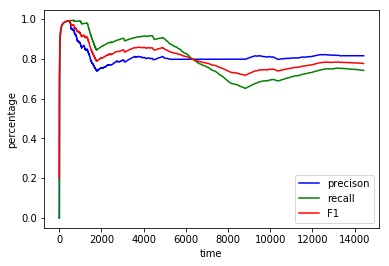

In [22]:
plt.plot(range(len(precision)),precision,c='b',label="precison")
plt.plot(range(len(recall)),recall,c='g',label="recall")
plt.plot(range(len(F1)),F1,c='r',label="F1")
plt.ylabel("percentage")
plt.xlabel("time")
plt.legend()
plt.savefig("../img/history_model.png")

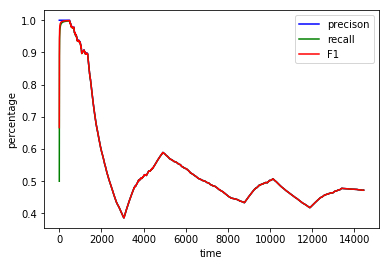

In [23]:
#baseline
total_count_base=0
has_pred_base=0
has_pred_true_base=0

shall_pred_base=0
shall_pred_true_base=0

precision_base=[]
recall_base=[]
F1_base=[]

#last as pred
ypred=0
for ytest in name_seq_delta_key:
    total_count_base+=1
    
    if(ypred!=0):
        has_pred_base+=1
        if(ypred==ytest):
            has_pred_true_base+=1
    
    
    if(ytest!=0):
        shall_pred_base+=1
        if(ypred==ytest):
            shall_pred_true_base+=1
            
    if(shall_pred_base>0 and has_pred_base>0):
        p=has_pred_true_base/has_pred_base
        r=shall_pred_true_base/shall_pred_base
        
        precision_base.append(p)
        recall_base.append(r)
        if(p+r>0):
            F1_base.append(2*p*r/(p+r))
    
    #print(ypred,ytest)
    
    ypred=ytest

plt.plot(range(len(precision_base)),precision_base,c='b',label="precison")
plt.plot(range(len(recall_base)),recall_base,c='g',label="recall")
plt.plot(range(len(F1_base)),F1_base,c='r',label="F1")
plt.ylabel("percentage")
plt.xlabel("time")
plt.legend()
plt.savefig("../img/baseline_history.png")

In [22]:
HIDDEN_SIZE=16
BATCH_SIZE=1
NUM_ITERATIONS=len(input_name)-10
#NUM_ITERATIONS=100
NUM_EPOCHS_PER_ITERATION=1

model=Sequential()
#model.add(LSTM(HIDDEN_SIZE,return_sequences=False,input_shape=(SEQLEN,NAME_TYPE),unroll=True,
#               kernel_regularizer=regularizers.l1_l2(l1=0.001,l2=0.001)))
model.add(LSTM(HIDDEN_SIZE,return_sequences=False,input_shape=(SEQLEN,NAME_TYPE),unroll=True,dropout=0.2))
model.add(Dense(NAME_TYPE))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=['acc'])

model.save("../model/dynamic_model.h5")

In [74]:
from keras.models import load_model
from keras.utils import to_categorical
from collections import Counter
import numpy as np

In [147]:
md=load_model("../model/dynamic_model.h5")

In [148]:
ID_MAP_DICT={}
ID_MAP_DICT2={}
ID_MAP_TOTAL=1

SEQLEN=5
NAME_TYPE=32

CUR_MAPPD_ID=1

DELTA_COUNTER=Counter()

CUR_DELTA=[1]*5

In [159]:
def dynamic_predict(id_in):
    global ID_MAP_DICT,ID_MAP_TOTAL,ID_MAP_DICT2,md
    
    id_map=1
    if id_in in ID_MAP_DICT:
        id_map=ID_MAP_DICT[id_in]
    else:
        ID_MAP_DICT[id_in]=ID_MAP_TOTAL
        ID_MAP_DICT2[ID_MAP_TOTAL]=id_in
        id_map=ID_MAP_TOTAL
        ID_MAP_TOTAL+=1
     
    global CUR_MAPPD_ID,DELTA_COUNTER,SEQLEN,NAME_TYPE,CUR_DELTA
    delta=id_map-CUR_MAPPD_ID
    CUR_MAPPD_ID=id_map
    DELTA_COUNTER[delta]+=1
    
    delta_map={}
    delta_map2={}
    total=1
    for i in DELTA_COUNTER.most_common(31):
        delta_map[i[0]]=total
        delta_map2[total]=i[0]
        total+=1
    
    cur_delta=[]
    for i in CUR_DELTA:
        if i in delta_map:
            cur_delta.append(delta_map[i])
        else:
            cur_delta.append(0)
    
    CUR_DELTA=CUR_DELTA[1:]
    CUR_DELTA.append(delta)
    
    if delta in delta_map:
        delta=delta_map[delta]
    else:
        delta=0
        
    
    x=to_categorical([cur_delta],num_classes=NAME_TYPE)
    y=to_categorical([delta],num_classes=NAME_TYPE)
    
    md.fit(x,y,batch_size=1,epochs=1,verbose=0)
    
    
    cur_delta=[]
    for i in CUR_DELTA:
        if i in delta_map:
            cur_delta.append(delta_map[i])
        else:
            cur_delta.append(0)
    
    x=to_categorical([cur_delta],num_classes=NAME_TYPE)
    
    pred=md.predict(x,verbose=0)[0]
    ypred=np.argmax(pred)
    
    
    if ypred in delta_map2:
        temp=delta_map2[ypred]+CUR_MAPPD_ID
        if temp in ID_MAP_DICT2:
            return ID_MAP_DICT2[temp]
        
        else: return 0
    else: return 0 
    

    
dynamic_predict(14)   

0

In [ ]:
total_count_dy=0
has_pred_dy=0
has_pred_true_dy=0

shall_pred_dy=0
shall_pred_true_dy=0

precision_dy=[]
recall_dy=[]
F1_dy=[]

for i in range(len(name_seq)-10):
    ypred=dynamic_predict(name_seq[i])
    ytest=name_seq[i+1]
    total_count_dy+=1
    
    if(ypred!=0):
        has_pred_dy+=1
        if(ypred==ytest):
            has_pred_true_dy+=1
    
    
    if(ytest!=0):
        shall_pred_dy+=1
        if(ypred==ytest):
            shall_pred_true_dy+=1
            
    if(shall_pred_dy>0 and has_pred_dy>0):
        p=has_pred_true_dy/has_pred_dy
        r=shall_pred_true_dy/shall_pred_dy
        
        precision_dy.append(p)
        recall_dy.append(r)
        if(p+r>0):
            F1_dy.append(2*p*r/(p+r))
    #print(ypred,ytest,ypred==ytest)

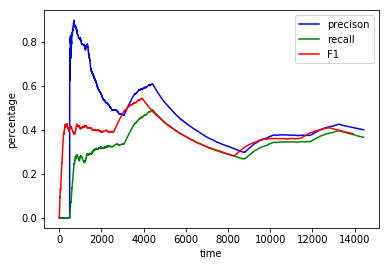

In [146]:
plt.plot(range(len(precision_dy)),precision_dy,c='b',label="precison")
plt.plot(range(len(recall_dy)),recall_dy,c='g',label="recall")
plt.plot(range(len(F1_dy)),F1_dy,c='r',label="F1")
plt.ylabel("percentage")
plt.xlabel("time")
plt.legend()
plt.savefig("../img/dy_history_3.png")

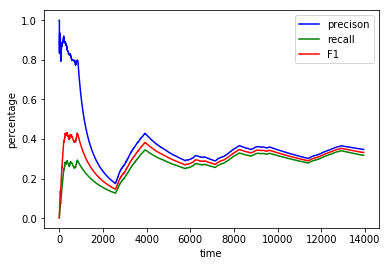

In [158]:
#baseline
total_count_base_dy=0
has_pred_base_dy=0
has_pred_true_base_dy=0

shall_pred_base_dy=0
shall_pred_true_base_dy=0

precision_base_dy=[]
recall_base_dy=[]
F1_base_dy=[]



#last as pred
ypred_dict={}
ylast=0
for ytest in name_seq:
    total_count_base_dy+=1
    
    ypred=0
    if ylast in ypred_dict:
        ypred=ypred_dict[ylast]
    
    ypred_dict[ylast]=ytest
    
    ylast=ytest
    
    if(ypred!=0):
        has_pred_base_dy+=1
        if(ypred==ytest):
            has_pred_true_base_dy+=1
    
    
    if(ytest!=0):
        shall_pred_base_dy+=1
        if(ypred==ytest):
            shall_pred_true_base_dy+=1
            
    if(shall_pred_base_dy>0 and has_pred_base_dy>0):
        p=has_pred_true_base_dy/has_pred_base_dy
        r=shall_pred_true_base_dy/shall_pred_base_dy
        
        precision_base_dy.append(p)
        recall_base_dy.append(r)
        if(p+r>0):
            F1_base_dy.append(2*p*r/(p+r))
    
    #print(ypred,ytest)
    
    

plt.plot(range(len(precision_base_dy)),precision_base_dy,c='b',label="precison")
plt.plot(range(len(recall_base_dy)),recall_base_dy,c='g',label="recall")
plt.plot(range(len(F1_base_dy)),F1_base_dy,c='r',label="F1")
plt.ylabel("percentage")
plt.xlabel("time")
plt.legend()
plt.savefig("../img/baseline_dy_history_2.png")

In [168]:
dynamic_predict(3)

4